### Assignment - Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
countries_data = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Inspecting the data

In [3]:
countries_data.shape

(167, 10)

In [4]:
countries_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Checking the missing values
round(100*(countries_data.isnull().sum())/len(countries_data),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no missing values and any other problems with the data

### Data preparation
The following columns are represented in % of gdpp. Hence these should be converted to their actual values
 1. Export
 2. Import
 3. Health

In [7]:
countries_data['exports'] = (countries_data['exports'] * countries_data['gdpp'])/100
countries_data['imports'] = (countries_data['imports'] * countries_data['gdpp'])/100
countries_data['health'] = (countries_data['health'] * countries_data['gdpp'])/100

In [8]:
countries_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840


We can see the actual values instead of percentages now.

### Data visualization - before capping

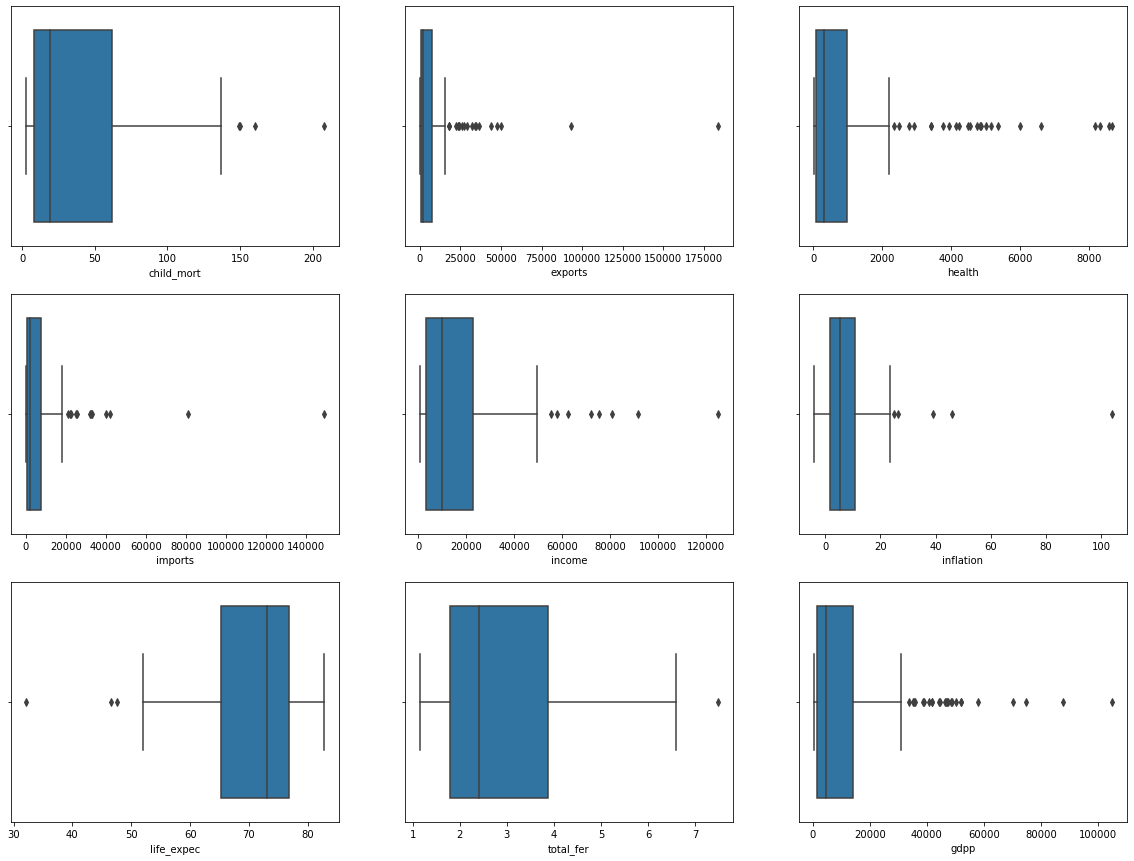

In [9]:
plt.figure(figsize=(20,15))
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(x=i[1], data=countries_data)

By looking at the above plots. It can be inferred that there are a large number of outliers in the data that can affect the clustering analysis. Hence we need to cap them. As there could be outliers on the lower side which are the countries that really need the aid, capping is only performed on the higher quantile

In [10]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for i in features:
    Q4 = countries_data[i].quantile(0.95)
    countries_data[i][countries_data[i] >= Q4]=Q4

countries_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.785030,5783.114656,954.012480,5140.089474,15738.760479,6.929317,70.522156,2.917479,11998.826347
std,36.215872,8580.053847,1453.426636,6696.210005,14787.154215,6.384357,8.850052,1.443771,15158.213199
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


### Data visualization - after capping

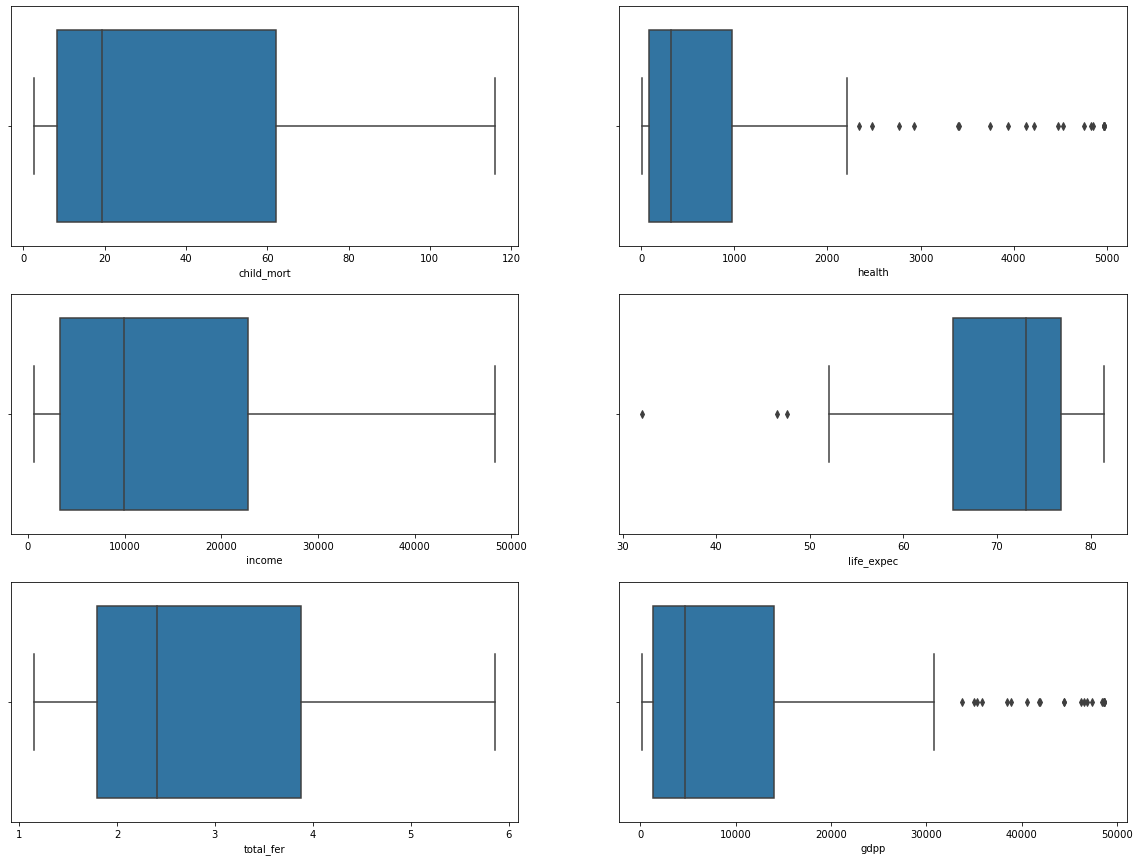

In [89]:
plt.figure(figsize=(20,15))
features = ['child_mort', 'health', 'income', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x=i[1], data=countries_data)
plt.savefig('boxplots.png')

### Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

df = countries_data.drop('country',axis=1)
scaled_data = standard_scaler.fit_transform(df)
scaled_data

array([[ 1.47934081, -0.66958102, -0.62943544, ..., -1.62318027,
         2.01642065, -0.75736169],
       [-0.5590294 , -0.54217181, -0.47348864, ...,  0.65482341,
        -0.88053487, -0.52332107],
       [-0.26269025, -0.47583812, -0.53001667, ...,  0.67749012,
        -0.01909006, -0.49883845],
       ...,
       [-0.37347124, -0.56578559, -0.59652699, ...,  0.29215616,
        -0.6721208 , -0.70727157],
       [ 0.54047193, -0.63010392, -0.61153387, ..., -0.34251153,
         1.21750006, -0.70727157],
       [ 1.28270456, -0.61289625, -0.59901824, ..., -2.09918104,
         1.72464096, -0.69734618]])

In [13]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [14]:
hopkins(df)

0.8830222361559199

### Modeling - Looking at the silhouette score and elbow curve plots to choose optimal number of clusters

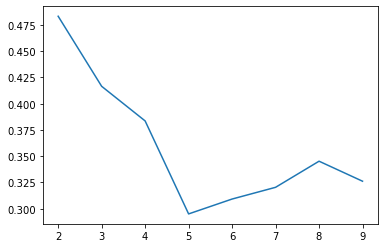

In [22]:
# Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
score = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i).fit(scaled_data)
    score.append([i, silhouette_score(scaled_data, kmeans.labels_)])
    
plt.plot(pd.DataFrame(score)[0], pd.DataFrame(score)[1]);

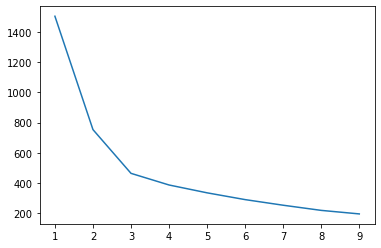

In [23]:
# Elbow curve analysis
ssd = []
for i in list(range(1,10)):
    model = KMeans(n_clusters = i, max_iter = 50).fit(scaled_data)
    ssd.append([i, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

By observing the above plots 3 and 4 as the number of clusters seems to be a good option as we can see in silhouette analysis that after 4 clusters the score drops drastically

### Performing KMeans with k = 3

In [24]:
# Choosing k = 3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [25]:
original_data = countries_data.copy()
original_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460
3,Angola,116.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200


In [26]:
cols = countries_data.columns
cols

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [27]:
# Adding cluster ID's to the data
kmean_df = pd.concat([countries_data.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
kmean_df.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']
kmean_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1
3,Angola,116.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1


In [28]:
kmean_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [29]:
# Checking the value counts of each cluster
kmean_df['cluster_id'].value_counts()

1    82
2    48
0    37
Name: cluster_id, dtype: int64

### Plotting the Kmean clusters

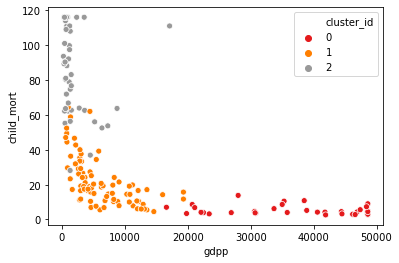

In [41]:
# gdpp vs child mortality
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

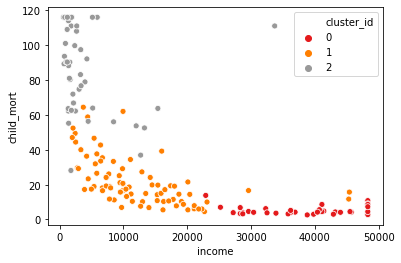

In [42]:
# income vs child mortality
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

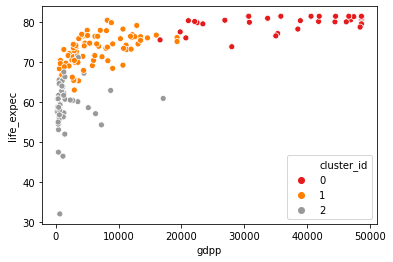

In [43]:
# gdpp vs life expectancy
sns.scatterplot(x = 'gdpp', y = 'life_expec', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

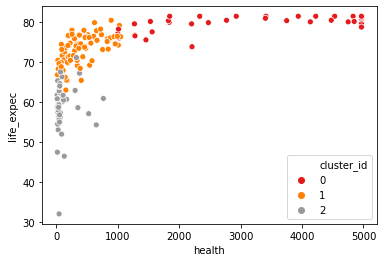

In [44]:
# health budget vs life expectancy
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

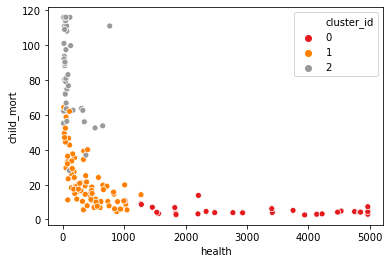

In [45]:
# health budget vs child mortality
sns.scatterplot(x = 'health', y = 'child_mort', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

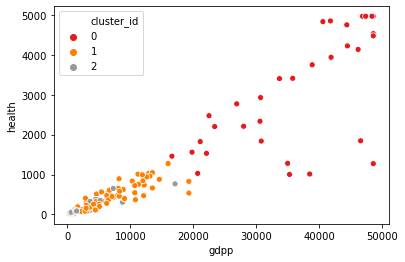

In [46]:
# gdpp vs health budget
sns.scatterplot(x = 'gdpp', y = 'health', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

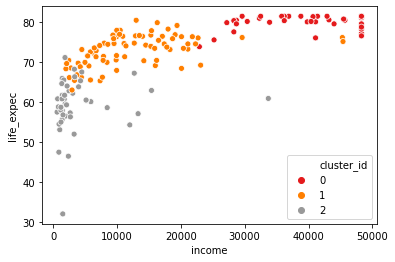

In [47]:
# income vs life expectancy
sns.scatterplot(x = 'income', y = 'life_expec', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

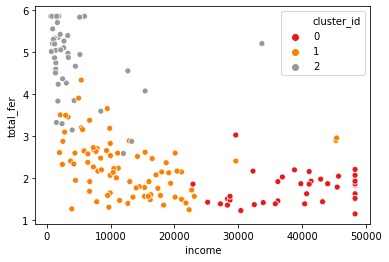

In [83]:
# income vs fertility
sns.scatterplot(x = 'income', y = 'total_fer', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

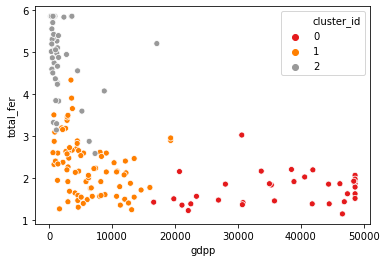

In [84]:
# gdpp vs fertility
sns.scatterplot(x = 'gdpp', y = 'total_fer', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

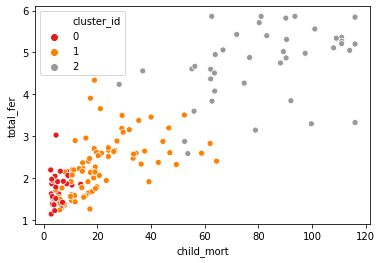

In [85]:
# child mortality vs fertility
sns.scatterplot(x = 'child_mort', y = 'total_fer', hue ='cluster_id', legend = 'full', data = kmean_df, palette='Set1')

By looking at the above plots we can infer that:
 - Cluster 2 has Low income, low gdpp with low life expectency and high child mortality rate
 - Cluster 2 also has high fertility rate despite the low income, low gdpp
 - We can also observe that the gdpp and health budget are almost linearly correlated as the gdpp increases the health budget also increases. The gdpp is a key driving factor of the health condition in a country
 - Hence Cluster 2 has the countries that are in dire need of the aid

### Cluster profiling

In [48]:
kmean_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1
3,Angola,116.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1


In [49]:
kmean_df.drop('country', axis=1).groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,5.237838,18780.372973,3285.879162,15698.857838,38711.081081,2.588432,79.805405,1.755676,37745.675676
1,21.951220,2789.162177,393.062322,2900.485623,12304.756098,7.155354,72.937805,2.289390,6287.463415
2,86.443750,879.063521,114.821765,827.028771,3897.354167,9.889271,59.239583,4.886021,1909.208333


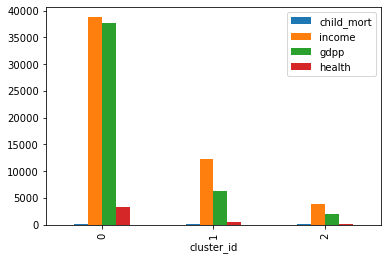

In [108]:
kmean_df.drop('country', axis=1)[['child_mort','income','gdpp', 'health','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
plt.savefig('clusterpro.png')

The same pattern emerges when we look at the above plot that again indicates that the cluster 2 has the countries that require the aid where the gdpp, income and health budget are very low compared to the other clusters

### Top 10 countries belonging to Cluster 2 in ascending order

In [56]:
kmean_df[kmean_df['cluster_id']==2].sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,2
112,Niger,116.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,2
132,Sierra Leone,116.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.600,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,2
31,Central African Republic,116.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.610,482,2


The top five countries the need the aid include:
 1. Burundi
 2. Liberia
 3. Congo, Dem. Rep
 4. Niger
 5. Sierra Leone

### Hierarchical Clustering

In [57]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [58]:
scaled_data

array([[ 1.47934081, -0.66958102, -0.62943544, ..., -1.62318027,
         2.01642065, -0.75736169],
       [-0.5590294 , -0.54217181, -0.47348864, ...,  0.65482341,
        -0.88053487, -0.52332107],
       [-0.26269025, -0.47583812, -0.53001667, ...,  0.67749012,
        -0.01909006, -0.49883845],
       ...,
       [-0.37347124, -0.56578559, -0.59652699, ...,  0.29215616,
        -0.6721208 , -0.70727157],
       [ 0.54047193, -0.63010392, -0.61153387, ..., -0.34251153,
         1.21750006, -0.70727157],
       [ 1.28270456, -0.61289625, -0.59901824, ..., -2.09918104,
         1.72464096, -0.69734618]])

In [59]:
kmean_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1
3,Angola,116.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.500,2970,1
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,20.87,75.4,2.470,13500,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.950,1310,1
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,20.87,67.5,4.670,1310,2


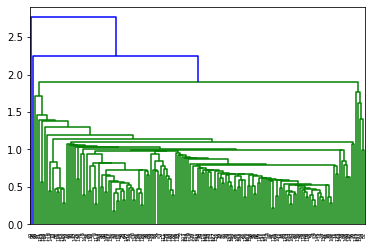

In [60]:
# Single linkage
mergings = linkage(scaled_data, method = 'single', metric='euclidean')
dendrogram(mergings)
plt.show()

Single linkage cannot be interpreted properly

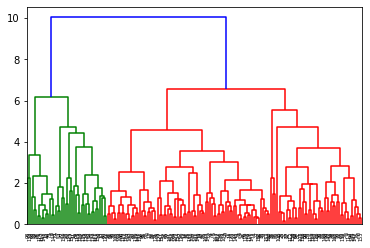

<Figure size 432x288 with 0 Axes>

In [109]:
# Complete linkage
mergings = linkage(scaled_data, method = 'complete', metric='euclidean')
dendrogram(mergings)
plt.show()
plt.savefig('completelinkage.png')

### Using 3 as the number of clusters

In [63]:
# Extracting clusters
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [64]:
# Assigning cluster labels
kmean_df['cluster_labels'] = cluster_labels
kmean_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,1,1
3,Angola,116.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,1,1


### Plotting Hierarchical clusters

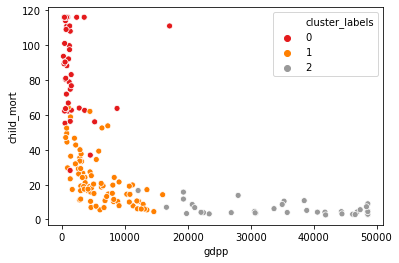

In [110]:
# gdpp vs child mortality
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')
plt.savefig('1.png')

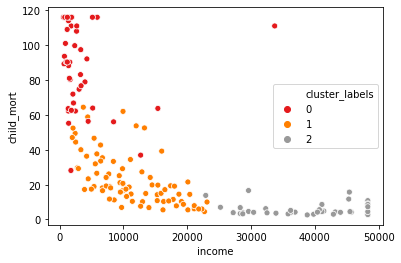

In [111]:
# income vs child mortality
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')
plt.savefig('2.png')

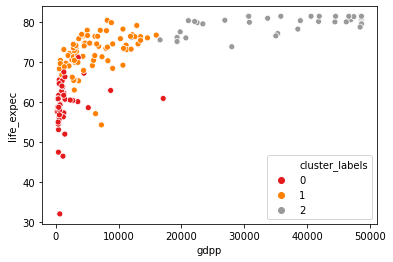

In [112]:
# gdpp vs life expectancy
sns.scatterplot(x = 'gdpp', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')
plt.savefig('3.png')

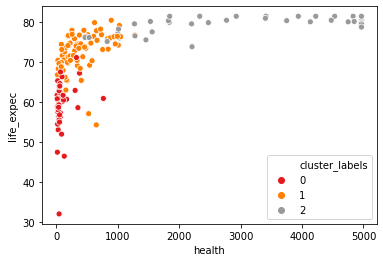

In [69]:
# health budget vs life expectancy
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')

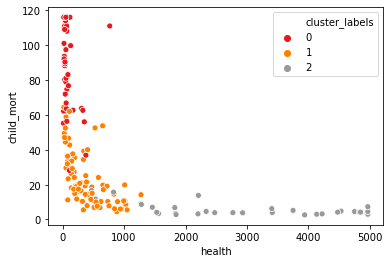

In [70]:
# health budget vs child mortality
sns.scatterplot(x = 'health', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')

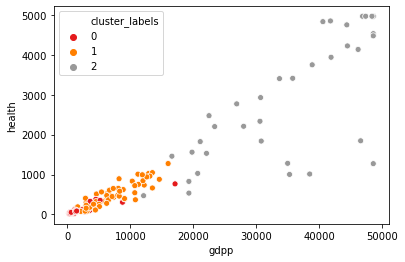

In [113]:
# gdpp vs health budget
sns.scatterplot(x = 'gdpp', y = 'health', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')
plt.savefig('4.png')

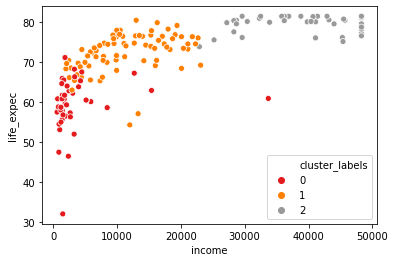

In [114]:
# income vs life expectancy
sns.scatterplot(x = 'income', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')
plt.savefig('5.png')

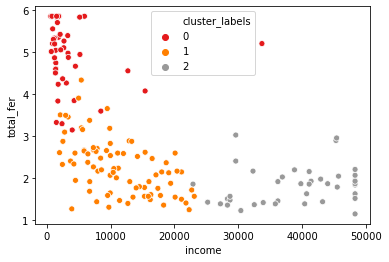

In [82]:
# income vs fertility
sns.scatterplot(x = 'income', y = 'total_fer', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')

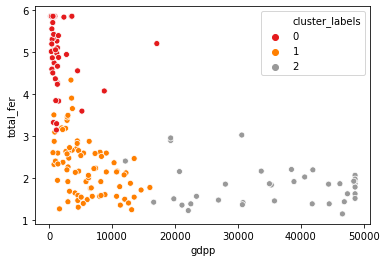

In [79]:
# gdpp vs fertility
sns.scatterplot(x = 'gdpp', y = 'total_fer', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')

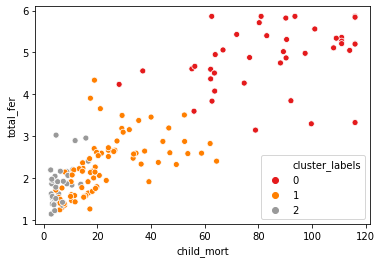

In [80]:
# child mortality vs fertility
sns.scatterplot(x = 'child_mort', y = 'total_fer', hue ='cluster_labels', legend = 'full', data = kmean_df, palette='Set1')

By looking at the above plots we can infer that:
 - Cluster 0 has Low income, low gdpp with low life expectency and high child mortality rate
 - Cluster 0 also has high fertility rate despite the low income, low gdpp
 - We can also observe that the gdpp and health budget are almost linearly correlated as the gdpp increases the health budget also increases. The gdpp is a key driving factor of the health condition in a country
 - Hence Cluster 0 has the countries that are in dire need of the aid

### Cluster Profiling using hierarchical cluster labels

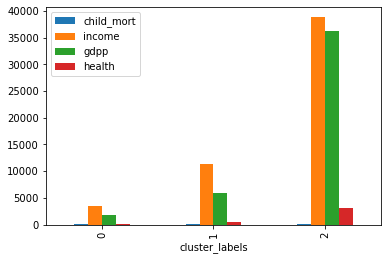

In [115]:
kmean_df.drop('country', axis=1)[['child_mort','income','gdpp','health','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar')
plt.savefig('6.png')

The same pattern emerges when we look at the above plot that again indicates that the cluster 2 has the countries that require the aid where the gdpp, income and health budget are very low compared to the other clusters

### Countries belonging to Cluster 0 in ascending order

In [86]:
kmean_df[kmean_df['cluster_labels']==0].sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,2,0
112,Niger,116.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,2,0
132,Sierra Leone,116.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,2,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.600,413,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,2,0
31,Central African Republic,116.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,2,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,2,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.610,482,2,0


### Both the methods (Kmeans and hierarchical) have given the same top 5 countries that require the aid

### Conclusion
    1. In this data set both methods resulted in same output
    2. Factors such as GDPP, health budget, income seems to affect the life expectancy and child mortality of the country
    3. Countries with higher GDPP seem to have less children born to each women which is in contrast to the lower 
    GDPP countries where the children born are higher with more child mortality in play

### The final countries list includes:
    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep
    4. Niger
    5. Sierra Leone